# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance (accuracy, precision, recall, and f-score) as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client for a any sepcific number of clients of your choice. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random


np.random.seed(42) # Set seed for numpy. Put your SID instead of number '42'
random.seed(42) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(42) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


##
##
## Write your code to calculate precision, recall, and F-score
##
##


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [2]:
np.random.seed(1940407) # Set seed for numpy. Put your SID instead of number '42'
random.seed(1940407) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(1940407) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model

## 2 Clients

In [7]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=1940407)

In [8]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

2024-03-22 14:32:12.278598: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-22 14:32:12.278623: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-22 14:32:12.278628: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-22 14:32:12.278659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-22 14:32:12.278675: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

Epoch 1/5
 12/938 [..............................] - ETA: 4s - loss: 1.8875 - accuracy: 0.3828  

2024-03-22 14:32:12.576372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 5s 5ms/step - loss: 0.4077 - accuracy: 0.8835
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3094 - accuracy: 0.9120
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2999 - accuracy: 0.9163
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2946 - accuracy: 0.9182
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2993 - accuracy: 0.9175
Epoch 1/5
 24/938 [..............................] - ETA: 4s - loss: 1.5556 - accuracy: 0.5352

2024-03-22 14:32:33.700529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 4s 4ms/step - loss: 0.4084 - accuracy: 0.8841
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3074 - accuracy: 0.9138
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2992 - accuracy: 0.9159
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2979 - accuracy: 0.9154
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2974 - accuracy: 0.9179


In [10]:
# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [11]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

In [12]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [13]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

2024-03-22 14:32:54.698451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.9685 - accuracy: 0.6866 - 1s/epoch - 3ms/step
Test accuracy: 0.6866000294685364


In [14]:
prediction = global_model.predict(x_test)
print(prediction.shape)

117/313 [==========>...................] - ETA: 0s

2024-03-22 14:32:55.771010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [15]:
prediction = list(prediction.argmax(axis=1))

In [16]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [17]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.90      0.90      0.90       980\n           1       0.94      0.56      0.70      1135\n           2       0.36      0.58      0.44      1032\n           3       0.87      0.62      0.72      1010\n           4       0.85      0.93      0.89       982\n           5       0.70      0.65      0.67       892\n           6       0.86      0.40      0.55       958\n           7       0.91      0.79      0.85      1028\n           8       0.39      0.69      0.50       974\n           9       0.78      0.76      0.77      1009\n\n    accuracy                           0.69     10000\n   macro avg       0.75      0.69      0.70     10000\nweighted avg       0.76      0.69      0.70     10000\n'

In [18]:
print("Accuracy score: ", accuracy_score(y_test, prediction))
print("Precision score: ", precision_score(y_test, prediction,average='weighted'))
print("Recall Score: ", recall_score(y_test, prediction,average='weighted'))
print("F1 Score: ",f1_score(y_test, prediction,average='weighted'))

Clients_2_Scores = [accuracy_score(y_test, prediction), precision_score(y_test, prediction,average='weighted'), recall_score(y_test, prediction,average='weighted'), f1_score(y_test, prediction,average='weighted')]

Accuracy score:  0.6866
Precision score:  0.756782028541091
Recall Score:  0.6866
F1 Score:  0.6986065860341957


## 4 Clients

In [19]:
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=1940407)

x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train_c1, y_train_c1, test_size=0.5, random_state=1940407)
x_train_c3, x_train_c4, y_train_c3, y_train_c4 = train_test_split(x_train_c2, y_train_c2, test_size=0.5, random_state=1940407)




In [20]:
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

In [21]:
client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)
client3_model = train_client_model(client3_model, x_train_c3, y_train_c3)
client4_model = train_client_model(client4_model, x_train_c4, y_train_c4)

Epoch 1/5
 23/469 [>.............................] - ETA: 2s - loss: 1.5541 - accuracy: 0.5204

2024-03-22 14:32:56.572186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 2s 5ms/step - loss: 0.4794 - accuracy: 0.8633
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3137 - accuracy: 0.9099
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2925 - accuracy: 0.9169
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2839 - accuracy: 0.9189
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2722 - accuracy: 0.9228
Epoch 1/5
 24/469 [>.............................] - ETA: 2s - loss: 1.6744 - accuracy: 0.4701

2024-03-22 14:33:07.361594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 2s 4ms/step - loss: 0.4952 - accuracy: 0.8555
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3113 - accuracy: 0.9112
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2915 - accuracy: 0.9182
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2787 - accuracy: 0.9177
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2704 - accuracy: 0.9208
Epoch 1/5
 25/235 [==>...........................] - ETA: 0s - loss: 1.5523 - accuracy: 0.5537

2024-03-22 14:33:17.763236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 0.6138 - accuracy: 0.8253
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.9003
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3051 - accuracy: 0.9132
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2828 - accuracy: 0.9209
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - accuracy: 0.9247
Epoch 1/5
 23/235 [=>............................] - ETA: 1s - loss: 1.5807 - accuracy: 0.5299

2024-03-22 14:33:23.293161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.5876 - accuracy: 0.8327
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3220 - accuracy: 0.9097
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2864 - accuracy: 0.9200
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2613 - accuracy: 0.9268
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2472 - accuracy: 0.9312


In [22]:
# Federated averaging
def federated_average_weights_4_Clients(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights

In [23]:
# Aggregate models
aggregated_weights = federated_average_weights_4_Clients(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(), 
                                               client4_model.get_weights())

In [24]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [25]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

2024-03-22 14:33:28.908191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.9121 - accuracy: 0.7553 - 1s/epoch - 3ms/step
Test accuracy: 0.755299985408783


In [26]:
prediction = global_model.predict(x_test)
prediction = list(prediction.argmax(axis=1))

120/313 [==========>...................] - ETA: 0s

2024-03-22 14:33:29.926019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [27]:
print("Accuracy score: ", accuracy_score(y_test, prediction))
print("Precision score: ", precision_score(y_test, prediction,average='weighted'))
print("Recall Score: ", recall_score(y_test, prediction,average='weighted'))
print("F1 Score: ",f1_score(y_test, prediction,average='weighted'))


Clients_4_Scores = [accuracy_score(y_test, prediction), precision_score(y_test, prediction,average='weighted'), recall_score(y_test, prediction,average='weighted'), f1_score(y_test, prediction,average='weighted')]

Accuracy score:  0.7553
Precision score:  0.7764296169650438
Recall Score:  0.7553
F1 Score:  0.7392733585387776


## 6 Clients

In [28]:
x_train_c1= x_train[0:10000]
x_train_c2= x_train[10000: 20000]
x_train_c3= x_train[20000: 30000]
x_train_c4= x_train[30000: 40000]
x_train_c5= x_train[40000: 50000]
x_train_c6= x_train[50000:]
y_train_c1= y_train[0:10000]
y_train_c2= y_train[10000: 20000]
y_train_c3= y_train[20000: 30000]
y_train_c4= y_train[30000: 40000]
y_train_c5= y_train[40000: 50000]
y_train_c6= y_train[50000:]

In [29]:
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

In [30]:
client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)
client3_model = train_client_model(client3_model, x_train_c3, y_train_c3)
client4_model = train_client_model(client4_model, x_train_c4, y_train_c4)
client5_model = train_client_model(client5_model, x_train_c5, y_train_c5)
client6_model = train_client_model(client6_model, x_train_c6, y_train_c6)

Epoch 1/5
 23/313 [=>............................] - ETA: 1s - loss: 1.6480 - accuracy: 0.4959

2024-03-22 14:33:30.624046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.5467 - accuracy: 0.8434
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3099 - accuracy: 0.9122
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2758 - accuracy: 0.9232
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 0.2609 - accuracy: 0.9261
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2470 - accuracy: 0.9295
Epoch 1/5
 24/313 [=>............................] - ETA: 1s - loss: 1.6470 - accuracy: 0.5143

2024-03-22 14:33:37.803083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.5627 - accuracy: 0.8373
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3253 - accuracy: 0.9046
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2939 - accuracy: 0.9158
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.9211
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2605 - accuracy: 0.9259
Epoch 1/5
 25/313 [=>............................] - ETA: 1s - loss: 1.5899 - accuracy: 0.5113

2024-03-22 14:33:44.887501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 0.5569 - accuracy: 0.8374
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3145 - accuracy: 0.9085
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2857 - accuracy: 0.9176
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2707 - accuracy: 0.9242
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2593 - accuracy: 0.9243
Epoch 1/5
 25/313 [=>............................] - ETA: 1s - loss: 1.5875 - accuracy: 0.4988

2024-03-22 14:33:51.903008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 0.5676 - accuracy: 0.8348
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.9023
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3038 - accuracy: 0.9093
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2851 - accuracy: 0.9176
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.9209
Epoch 1/5
 25/313 [=>............................] - ETA: 1s - loss: 1.5817 - accuracy: 0.5175

2024-03-22 14:33:58.902021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 0.5660 - accuracy: 0.8353
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3313 - accuracy: 0.9049
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3058 - accuracy: 0.9103
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2805 - accuracy: 0.9169
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2684 - accuracy: 0.9201
Epoch 1/5
 21/313 [=>............................] - ETA: 1s - loss: 1.6280 - accuracy: 0.4985

2024-03-22 14:34:05.917754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.5133 - accuracy: 0.8526
Epoch 2/5
313/313 [==============================] - 1s 5ms/step - loss: 0.2915 - accuracy: 0.9157
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2598 - accuracy: 0.9242
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 0.2365 - accuracy: 0.9335
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.2268 - accuracy: 0.9367


In [31]:
# Federated averaging
def federated_average_weights_4_Clients(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights

In [32]:
# Aggregate models
aggregated_weights = federated_average_weights_4_Clients(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(), 
                                               client4_model.get_weights(),
                                               client5_model.get_weights(), 
                                               client6_model.get_weights())

In [33]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

prediction = global_model.predict(x_test)
prediction = list(prediction.argmax(axis=1))

print("Accuracy score: ", accuracy_score(y_test, prediction))
print("Precision score: ", precision_score(y_test, prediction,average='weighted'))
print("Recall Score: ", recall_score(y_test, prediction,average='weighted'))
print("F1 Score: ",f1_score(y_test, prediction,average='weighted'))



Clients_6_Scores = [accuracy_score(y_test, prediction), precision_score(y_test, prediction,average='weighted'), recall_score(y_test, prediction,average='weighted'), f1_score(y_test, prediction,average='weighted')]

2024-03-22 14:34:13.613917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 1.1710 - accuracy: 0.7978 - 1s/epoch - 3ms/step
Test accuracy: 0.7978000044822693
107/313 [=========>....................] - ETA: 0s

2024-03-22 14:34:14.670276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Accuracy score:  0.7978
Precision score:  0.8218113748306616
Recall Score:  0.7978
F1 Score:  0.7947429484835027


## 8 Clients

In [34]:
x_train_c1= x_train[0:7500]
x_train_c2= x_train[7500: 15000]
x_train_c3= x_train[15000: 22500]
x_train_c4= x_train[22500: 30000]
x_train_c5= x_train[30000: 37500]
x_train_c6= x_train[37500:45000]
x_train_c7= x_train[45000:52500]
x_train_c8= x_train[52500:]

y_train_c1= y_train[0:7500]
y_train_c2= y_train[7500: 15000]
y_train_c3= y_train[15000: 22500]
y_train_c4= y_train[22500: 30000]
y_train_c5= y_train[30000: 37500]
y_train_c6= y_train[37500:45000]
y_train_c7= y_train[45000:52500]
y_train_c8= y_train[52500:]

In [35]:
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

In [36]:
client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)
client3_model = train_client_model(client3_model, x_train_c3, y_train_c3)
client4_model = train_client_model(client4_model, x_train_c4, y_train_c4)
client5_model = train_client_model(client5_model, x_train_c5, y_train_c5)
client6_model = train_client_model(client6_model, x_train_c6, y_train_c6)
client7_model = train_client_model(client7_model, x_train_c7, y_train_c7)
client8_model = train_client_model(client8_model, x_train_c8, y_train_c8)

Epoch 1/5
 23/235 [=>............................] - ETA: 1s - loss: 1.5201 - accuracy: 0.5448

2024-03-22 14:34:15.392407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.5641 - accuracy: 0.8412
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3054 - accuracy: 0.9120
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2748 - accuracy: 0.9181
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2491 - accuracy: 0.9283
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2324 - accuracy: 0.9325
Epoch 1/5
 12/235 [>.............................] - ETA: 1s - loss: 1.9068 - accuracy: 0.3906 

2024-03-22 14:34:21.090712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.6176 - accuracy: 0.8196
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3574 - accuracy: 0.8955
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.9107
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2898 - accuracy: 0.9187
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2761 - accuracy: 0.9217
Epoch 1/5
 25/235 [==>...........................] - ETA: 0s - loss: 1.5903 - accuracy: 0.4950

2024-03-22 14:34:26.535913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 0.5949 - accuracy: 0.8281
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3188 - accuracy: 0.9132
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2795 - accuracy: 0.9209
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2540 - accuracy: 0.9283
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2402 - accuracy: 0.9345
Epoch 1/5
 23/235 [=>............................] - ETA: 0s - loss: 1.6789 - accuracy: 0.4715   

2024-03-22 14:34:31.860566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.6143 - accuracy: 0.8235
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.9045
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2796 - accuracy: 0.9209
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2573 - accuracy: 0.9263
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2435 - accuracy: 0.9297
Epoch 1/5
 25/235 [==>...........................] - ETA: 0s - loss: 1.5750 - accuracy: 0.5550

2024-03-22 14:34:37.204587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 0.6311 - accuracy: 0.8204
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3438 - accuracy: 0.9013
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3066 - accuracy: 0.9115
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2784 - accuracy: 0.9185
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.9265
Epoch 1/5
 25/235 [==>...........................] - ETA: 0s - loss: 1.6209 - accuracy: 0.4950

2024-03-22 14:34:42.553444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.6157 - accuracy: 0.8215
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3358 - accuracy: 0.9008
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2972 - accuracy: 0.9132
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2786 - accuracy: 0.9151
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2623 - accuracy: 0.9224
Epoch 1/5
 24/235 [==>...........................] - ETA: 0s - loss: 1.5393 - accuracy: 0.5156

2024-03-22 14:34:47.916458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 0.6068 - accuracy: 0.8221
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.9029
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3013 - accuracy: 0.9149
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2748 - accuracy: 0.9212
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2572 - accuracy: 0.9291
Epoch 1/5
 25/235 [==>...........................] - ETA: 0s - loss: 1.5830 - accuracy: 0.5225

2024-03-22 14:34:53.300580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 0.5541 - accuracy: 0.8411
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.9149
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2471 - accuracy: 0.9245
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2292 - accuracy: 0.9333
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2116 - accuracy: 0.9351


In [37]:
# Federated averaging
def federated_average_weights_4_Clients(weights1, weights2, weights3, weights4, weights5, weights6, weights7, weights8):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8 in zip(weights1, weights2, weights3, weights4, weights5, weights6, weights7, weights8):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8) / 8)
    return new_weights

In [38]:
# Aggregate models
aggregated_weights = federated_average_weights_4_Clients(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(), 
                                               client4_model.get_weights(),
                                               client5_model.get_weights(), 
                                               client6_model.get_weights(),
                                               client7_model.get_weights(), 
                                               client8_model.get_weights())

In [39]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

prediction = global_model.predict(x_test)
prediction = list(prediction.argmax(axis=1))

print("Accuracy score: ", accuracy_score(y_test, prediction))
print("Precision score: ", precision_score(y_test, prediction,average='weighted'))
print("Recall Score: ", recall_score(y_test, prediction,average='weighted'))
print("F1 Score: ",f1_score(y_test, prediction,average='weighted'))


Clients_8_Scores = [accuracy_score(y_test, prediction), precision_score(y_test, prediction,average='weighted'), recall_score(y_test, prediction,average='weighted'), f1_score(y_test, prediction,average='weighted')]

2024-03-22 14:34:58.652819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 1.3772 - accuracy: 0.7651 - 1s/epoch - 3ms/step
Test accuracy: 0.7651000022888184
120/313 [==========>...................] - ETA: 0s

2024-03-22 14:34:59.657665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Accuracy score:  0.7651
Precision score:  0.8397713246272402
Recall Score:  0.7651
F1 Score:  0.7589859286641858


## 10 Clients

In [40]:
x_train_c1= x_train[0:6000]
x_train_c2= x_train[6000:12000]
x_train_c3= x_train[12000:18000]
x_train_c4= x_train[18000:24000]
x_train_c5= x_train[24000:30000]
x_train_c6= x_train[30000:36000]
x_train_c7= x_train[36000:42000]
x_train_c8= x_train[42000:48000]
x_train_c9= x_train[48000:54000]
x_train_c10= x_train[54000:]



y_train_c1= y_train[0:6000]
y_train_c2= y_train[6000:12000]
y_train_c3= y_train[12000:18000]
y_train_c4= y_train[18000:24000]
y_train_c5= y_train[24000:30000]
y_train_c6= y_train[30000:36000]
y_train_c7= y_train[36000:42000]
y_train_c8= y_train[42000:48000]
y_train_c9= y_train[48000:54000]
y_train_c10= y_train[54000:]

In [41]:
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()
client9_model = create_client_model()
client10_model = create_client_model()

In [42]:
client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)
client3_model = train_client_model(client3_model, x_train_c3, y_train_c3)
client4_model = train_client_model(client4_model, x_train_c4, y_train_c4)
client5_model = train_client_model(client5_model, x_train_c5, y_train_c5)
client6_model = train_client_model(client6_model, x_train_c6, y_train_c6)
client7_model = train_client_model(client7_model, x_train_c7, y_train_c7)
client8_model = train_client_model(client8_model, x_train_c8, y_train_c8)
client9_model = train_client_model(client9_model, x_train_c9, y_train_c9)
client10_model = train_client_model(client10_model, x_train_c10, y_train_c10)

Epoch 1/5
 24/188 [==>...........................] - ETA: 0s - loss: 1.5603 - accuracy: 0.5195

2024-03-22 14:35:00.350433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.6281 - accuracy: 0.8243
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3157 - accuracy: 0.9103
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2689 - accuracy: 0.9243
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2447 - accuracy: 0.9328
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2295 - accuracy: 0.9352
Epoch 1/5
 24/188 [==>...........................] - ETA: 0s - loss: 1.5188 - accuracy: 0.5586

2024-03-22 14:35:04.721663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 4ms/step - loss: 0.6265 - accuracy: 0.8188
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.9058
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2794 - accuracy: 0.9193
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2557 - accuracy: 0.9237
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2345 - accuracy: 0.9295
Epoch 1/5
 24/188 [==>...........................] - ETA: 0s - loss: 1.6824 - accuracy: 0.4727

2024-03-22 14:35:09.025664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 4ms/step - loss: 0.7252 - accuracy: 0.7887
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3773 - accuracy: 0.8907
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8998
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2904 - accuracy: 0.9133
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2710 - accuracy: 0.9205
Epoch 1/5
 25/188 [==>...........................] - ETA: 0s - loss: 1.5232 - accuracy: 0.5337

2024-03-22 14:35:13.353050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 4ms/step - loss: 0.6295 - accuracy: 0.8228
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.9120
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2715 - accuracy: 0.9257
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2439 - accuracy: 0.9312
Epoch 5/5
188/188 [==============================] - 1s 6ms/step - loss: 0.2275 - accuracy: 0.9370
Epoch 1/5
 23/188 [==>...........................] - ETA: 0s - loss: 1.5961 - accuracy: 0.5095

2024-03-22 14:35:17.959007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.6767 - accuracy: 0.8088
Epoch 2/5
188/188 [==============================] - 1s 5ms/step - loss: 0.3395 - accuracy: 0.9023
Epoch 3/5
188/188 [==============================] - 1s 5ms/step - loss: 0.2880 - accuracy: 0.9177
Epoch 4/5
188/188 [==============================] - 1s 5ms/step - loss: 0.2602 - accuracy: 0.9260
Epoch 5/5
188/188 [==============================] - 1s 5ms/step - loss: 0.2433 - accuracy: 0.9307
Epoch 1/5
 21/188 [==>...........................] - ETA: 0s - loss: 1.8047 - accuracy: 0.4122   

2024-03-22 14:35:22.591192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.7031 - accuracy: 0.7970
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3438 - accuracy: 0.9027
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2939 - accuracy: 0.9148
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2702 - accuracy: 0.9200
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2517 - accuracy: 0.9240
Epoch 1/5
 25/188 [==>...........................] - ETA: 0s - loss: 1.5432 - accuracy: 0.5387

2024-03-22 14:35:27.029184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.6710 - accuracy: 0.8042
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3572 - accuracy: 0.8982
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3091 - accuracy: 0.9115
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.9158
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2703 - accuracy: 0.9202
Epoch 1/5
 25/188 [==>...........................] - ETA: 0s - loss: 1.5570 - accuracy: 0.5387

2024-03-22 14:35:31.359878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.6716 - accuracy: 0.8035
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3595 - accuracy: 0.8928
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3092 - accuracy: 0.9075
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2876 - accuracy: 0.9150
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2660 - accuracy: 0.9197
Epoch 1/5
 13/188 [=>............................] - ETA: 0s - loss: 1.8717 - accuracy: 0.3726 

2024-03-22 14:35:35.686013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.6536 - accuracy: 0.8122
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.9027
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.9133
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2694 - accuracy: 0.9237
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.9285
Epoch 1/5
 25/188 [==>...........................] - ETA: 0s - loss: 1.5878 - accuracy: 0.5288

2024-03-22 14:35:40.049061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 5ms/step - loss: 0.5929 - accuracy: 0.8362
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2772 - accuracy: 0.9202
Epoch 3/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2313 - accuracy: 0.9337
Epoch 4/5
188/188 [==============================] - 1s 4ms/step - loss: 0.2094 - accuracy: 0.9388
Epoch 5/5
188/188 [==============================] - 1s 4ms/step - loss: 0.1948 - accuracy: 0.9445


In [43]:
# Federated averaging
def federated_average_weights_4_Clients(weights1, weights2, weights3, weights4, weights5, weights6, weights7, weights8, weights9, weights10):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 in zip(weights1, weights2, weights3, weights4, weights5, weights6, weights7, weights8, weights9, weights10):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10)
    return new_weights

In [44]:
# Aggregate models
aggregated_weights = federated_average_weights_4_Clients(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(), 
                                               client4_model.get_weights(),
                                               client5_model.get_weights(), 
                                               client6_model.get_weights(),
                                               client7_model.get_weights(), 
                                               client8_model.get_weights(),
                                               client9_model.get_weights(), 
                                               client10_model.get_weights())

In [45]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

prediction = global_model.predict(x_test)
prediction = list(prediction.argmax(axis=1))

print("Accuracy score: ", accuracy_score(y_test, prediction))
print("Precision score: ", precision_score(y_test, prediction,average='weighted'))
print("Recall Score: ", recall_score(y_test, prediction,average='weighted'))
print("F1 Score: ",f1_score(y_test, prediction,average='weighted'))


Clients_10_Scores = [accuracy_score(y_test, prediction), precision_score(y_test, prediction,average='weighted'), recall_score(y_test, prediction,average='weighted'), f1_score(y_test, prediction,average='weighted')]


2024-03-22 14:35:44.386706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 1.5333 - accuracy: 0.6819 - 1s/epoch - 3ms/step
Test accuracy: 0.6819000244140625
119/313 [==========>...................] - ETA: 0s

2024-03-22 14:35:45.402947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Accuracy score:  0.6819
Precision score:  0.824093666676365
Recall Score:  0.6819
F1 Score:  0.687801251939939


In [46]:
print(Clients_2_Scores)
print(Clients_4_Scores)
print(Clients_6_Scores)
print(Clients_8_Scores)
print(Clients_10_Scores)

[0.6866, 0.756782028541091, 0.6866, 0.6986065860341957]
[0.7553, 0.7764296169650438, 0.7553, 0.7392733585387776]
[0.7978, 0.8218113748306616, 0.7978, 0.7947429484835027]
[0.7651, 0.8397713246272402, 0.7651, 0.7589859286641858]
[0.6819, 0.824093666676365, 0.6819, 0.687801251939939]


In [47]:
import pandas as pd

In [58]:
error_metrics = []
error_metrics.append(Clients_2_Scores)
error_metrics.append(Clients_4_Scores)
error_metrics.append(Clients_6_Scores)
error_metrics.append(Clients_8_Scores)
error_metrics.append(Clients_10_Scores)

print(error_metrics)

[[0.6866, 0.756782028541091, 0.6866, 0.6986065860341957], [0.7553, 0.7764296169650438, 0.7553, 0.7392733585387776], [0.7978, 0.8218113748306616, 0.7978, 0.7947429484835027], [0.7651, 0.8397713246272402, 0.7651, 0.7589859286641858], [0.6819, 0.824093666676365, 0.6819, 0.687801251939939]]


In [65]:
error_metrics_pd = pd.DataFrame(error_metrics)
error_metrics_pd.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
error_metrics_pd = error_metrics_pd.T
error_metrics_pd.columns = ['2 Clients', '4 Clients', '6 Clients', '8 Clients', '10 Clients']
error_metrics_pd = error_metrics_pd.T
error_metrics_pd

,Accuracy,Precision,Recall,F1-Score
2 Clients,0.6866,0.756782,0.6866,0.698607
4 Clients,0.7553,0.776430,0.7553,0.739273
6 Clients,0.7978,0.821811,0.7978,0.794743
8 Clients,0.7651,0.839771,0.7651,0.758986
10 Clients,0.6819,0.824094,0.6819,0.687801


In [1]:
import pandas as pd

data = {
    'Clients': ['2 Clients', '4 Clients', '6 Clients', '8 Clients', '10 Clients'],
    'Accuracy': [0.6866, 0.7553, 0.7978, 0.7651, 0.6819],
    'Precision': [0.756782, 0.776430, 0.821811, 0.839771, 0.824094],
    'Recall': [0.6866, 0.7553, 0.7978, 0.7651, 0.6819],
    'F1-Score': [0.698607, 0.739273, 0.794743, 0.758986, 0.687801]
}

df = pd.DataFrame(data)


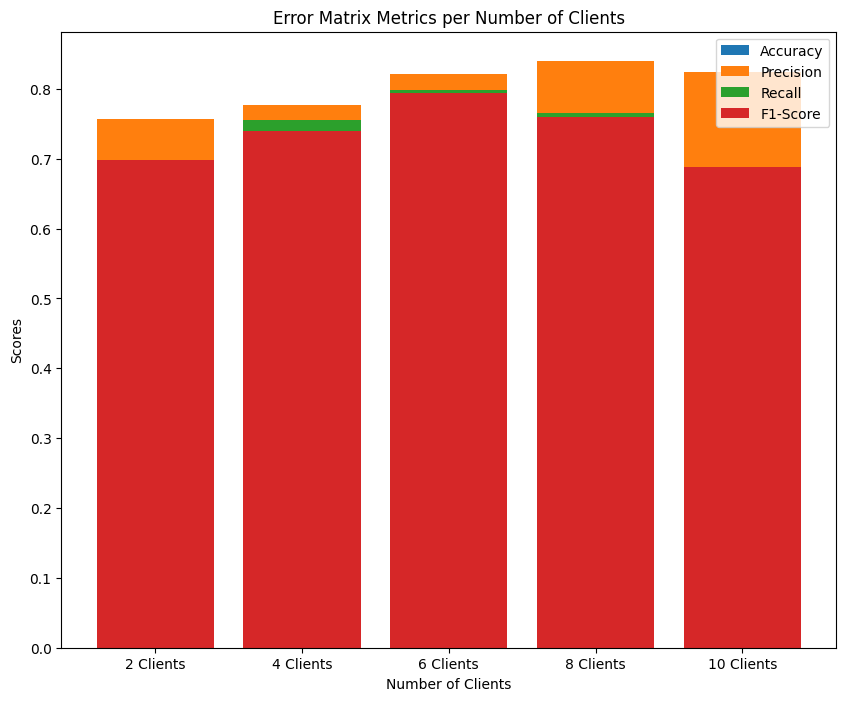

In [2]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot each column
for column in df.columns[1:]:  # Skip the 'Clients' column for the x-axis
    plt.bar(df['Clients'], df[column], label=column)

# Add some labels and title
plt.xlabel('Number of Clients')
plt.ylabel('Scores')
plt.title('Error Matrix Metrics per Number of Clients')
plt.legend()

# Show the plot
plt.show()


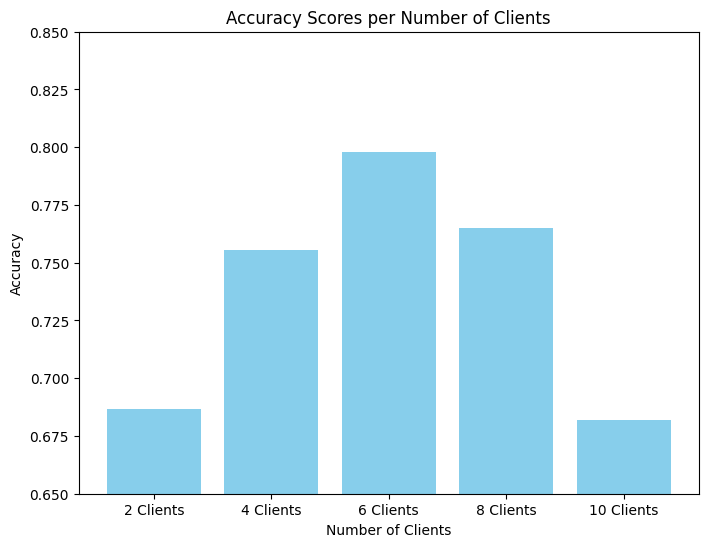

In [3]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Plot Accuracy data
plt.bar(df['Clients'], df['Accuracy'], color='skyblue')  # Choosing a color for the bars

# Add labels and title
plt.xlabel('Number of Clients')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores per Number of Clients')
plt.ylim(0.65, 0.85)  # Set y-axis limits to better visualize differences

# Show the plot
plt.show()

# Lab Logbook requirement: Document the following in lablogbook

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.




# Challenges (Optional):

## The above code is for one communication round. Write code for multiple communication rounds. In each communication round, clients will train the model on a new dataset. Then the server will merge all these models. Subsequently, the clients will retrain the merged model in the next communication round.

